<a href="https://colab.research.google.com/github/sophiebarber/NBA_FAS_Program/blob/main/2024_NBA_Future_Analytics_Stars_Coding_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from statistics import mean
from sklearn import datasets
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fas_2024.csv to fas_2024.csv


In [ ]:
# Load the fas_2024.csv data
import io
df = pd.read_csv(io.BytesIO(uploaded['fas_2024.csv']))
df.head()

,Name,three_pct_season,lwr_paint_pct_oct_nov,upr_paint_pct_oct_nov,mid_pct_oct_nov,three_non_cnr_pct_oct_nov,three_cnr_pct_oct_nov,ft_pct_oct_nov,lwr_paint_shots_oct_nov,upr_paint_shots_oct_nov,mid_shots_oct_nov,three_non_cnr_shots_oct_nov,three_cnr_shots_oct_nov,ft_shots_oct_nov
0,Malcolm Brogdon,0.437,0.484,0.619,0.600,0.444,0.485,0.863,62,21,10,27,33,51
1,Tyrese Maxey,0.435,0.505,0.452,0.458,0.512,0.361,0.738,105,42,24,41,61,65
2,Stephen Curry,0.432,0.706,0.526,0.467,0.415,0.466,0.907,109,38,30,82,148,107
3,Kentavious Caldwell-Pope,0.422,0.484,0.250,0.448,0.512,0.476,0.767,31,16,29,43,42,30
4,Jevon Carter,0.421,0.483,0.375,0.500,0.321,0.480,0.846,29,16,32,28,50,13


##Data Exploration

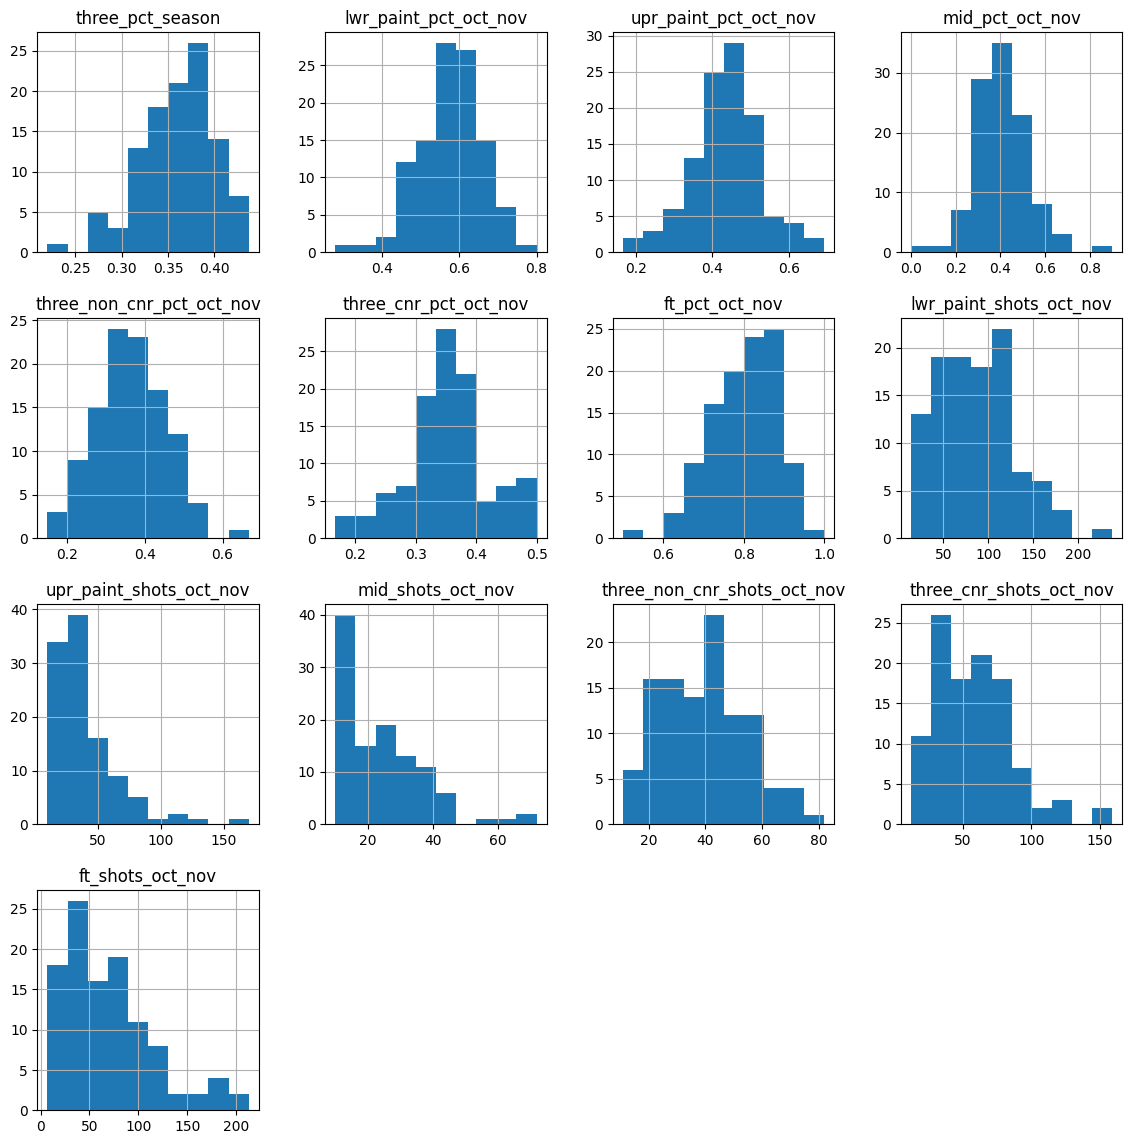

In [ ]:
import matplotlib.pyplot as plt
x = df.drop(columns=['Name'])
x.hist(figsize=(14, 14))
plt.show()

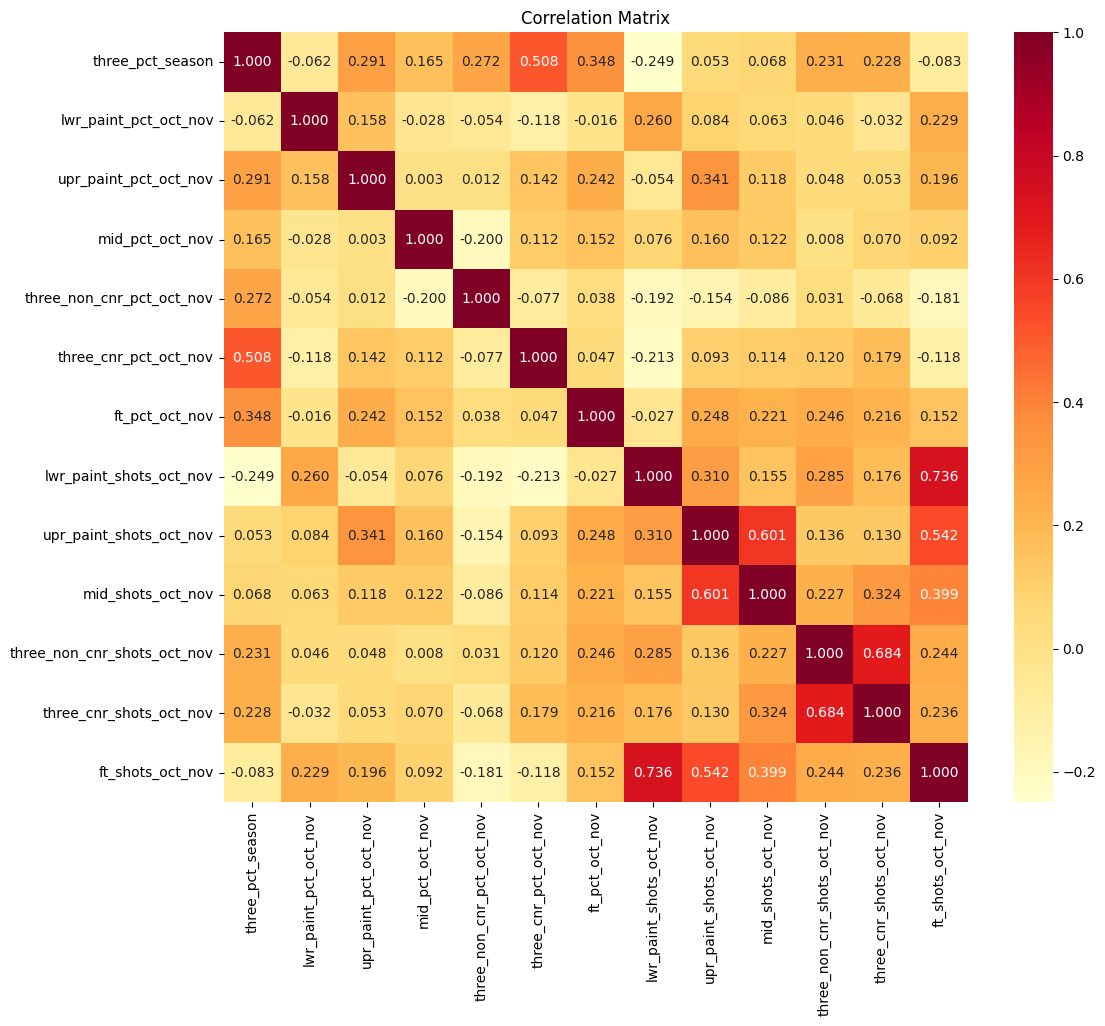

In [ ]:
# Create a heatmap to visualize the correlation matrix
import seaborn as sns
corr_matrix = x.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='YlOrRd')
plt.title("Correlation Matrix")
plt.show()

## Standardization of features

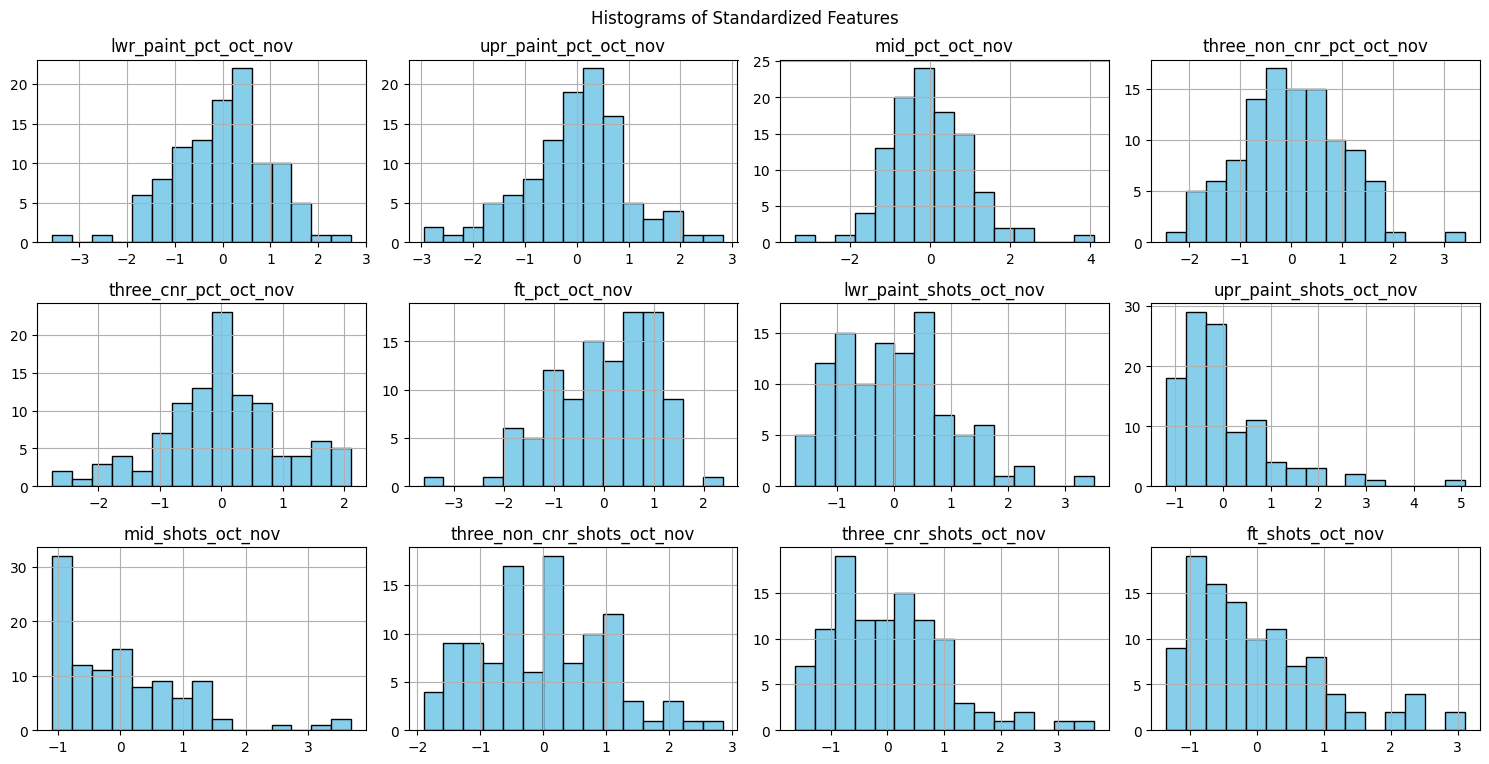

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select columns excluding 'three_pct_season' to standardize
features_to_standardize = [column for column in df.columns if column not in ['three_pct_season', 'Name']]

# Initialize standardScaler
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(df[features_to_standardize])

df[features_to_standardize] = scaler.transform(df[features_to_standardize])

standardized_features = df.columns.drop(['three_pct_season', 'Name'])


df[standardized_features].hist(bins=15, figsize=(15, 10), layout=(4, 4), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Standardized Features')
plt.tight_layout()
plt.show()

In [ ]:
numerical_scaled_df = df[standardized_features]
print(numerical_scaled_df.head())

   lwr_paint_pct_oct_nov  upr_paint_pct_oct_nov  mid_pct_oct_nov  \
0              -1.096806               2.012257         1.598134   
1              -0.844799               0.176492         0.419137   
2               1.567262               0.989945         0.493863   
3              -1.096806              -2.044013         0.336109   
4              -1.108806              -0.669938         0.767855   

   three_non_cnr_pct_oct_nov  three_cnr_pct_oct_nov  ft_pct_oct_nov  \
0                   0.880103               1.898897        0.739190   
1                   1.651493               0.086996       -0.756474   
2                   0.551128               1.621267        1.265664   
3                   1.651493               1.767388       -0.409480   
4                  -0.515205               1.825836        0.535780   

   lwr_paint_shots_oct_nov  upr_paint_shots_oct_nov  mid_shots_oct_nov  \
0                -0.611256                -0.761815          -1.084489   
1               

In [ ]:
combined_df = pd.concat([df['three_pct_season'], numerical_scaled_df], axis=1)
print(combined_df.head())

   three_pct_season  lwr_paint_pct_oct_nov  upr_paint_pct_oct_nov  \
0             0.437              -1.096806               2.012257   
1             0.435              -0.844799               0.176492   
2             0.432               1.567262               0.989945   
3             0.422              -1.096806              -2.044013   
4             0.421              -1.108806              -0.669938   

   mid_pct_oct_nov  three_non_cnr_pct_oct_nov  three_cnr_pct_oct_nov  \
0         1.598134                   0.880103               1.898897   
1         0.419137                   1.651493               0.086996   
2         0.493863                   0.551128               1.621267   
3         0.336109                   1.651493               1.767388   
4         0.767855                  -0.515205               1.825836   

   ft_pct_oct_nov  lwr_paint_shots_oct_nov  upr_paint_shots_oct_nov  \
0        0.739190                -0.611256                -0.761815   
1       -0

## Data Split


In this section, I also include the Linear Regression Model for applying all independent variables for later comparison.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Defining input (X) and output (y) variables
X = combined_df.iloc[:, 1:]  # All rows, all columns except the first
y = combined_df.iloc[:, 0]   # All rows, only the first column

# Dividing the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Let's see how the model's MSE on training and validation perform when we throw all x variables into the regression model. (See the last section, results, for comparison.)

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred)
print(f"The MSE on training is: {mse_train}")

The MSE on training is: 0.0007149934411384727


In [ ]:
# Make predictions on the validation set
y_val_pred = model.predict(X_test)
mse_val = mean_squared_error(y_test, y_val_pred)
print(f"The MSE on validation is: {mse_val}")

The MSE on validation is: 0.0009811857942859372


## K Fold Validation


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

def cross_val_mse_test(X, y, f):
    kf = KFold(n_splits=f, shuffle=True, random_state=5)
    mse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        # Assuming you have predictions from your model
        y_pred = model.predict(X_test)

        # Calculate MSE
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

    # Calculate the average MSE over the folds
    average_mse = np.mean(mse_scores)

    return average_mse

In [ ]:
from itertools import combinations

# Define the number of features
num_features = X_train.shape[1]

# Create all possible feature combinations
all_feature_combinations = [c for i in range(1, num_features+1) for c in combinations(range(num_features), i)]

# Initialize the minimum mean squared error and corresponding feature combination
min_mse = float('inf')
best_feature_combination = None

# Iterate through each feature combination
for feature_combination in all_feature_combinations:
    # Select the corresponding subset of features
    selected_features = X_train.iloc[:, list(feature_combination)]

    # Calculate the mean squared error
    mse = cross_val_mse_test(selected_features, y_train, 5)

    # Update the minimum mean squared error and corresponding feature combination
    if mse < min_mse:
        min_mse = mse
        best_feature_combination = selected_features.columns.tolist()

print("Best Feature Combination:", best_feature_combination)
print("Minimum Cross-Validation MSE:", min_mse)


Best Feature Combination: ['upr_paint_pct_oct_nov', 'mid_pct_oct_nov', 'three_non_cnr_pct_oct_nov', 'three_cnr_pct_oct_nov', 'ft_pct_oct_nov', 'lwr_paint_shots_oct_nov', 'mid_shots_oct_nov', 'three_non_cnr_shots_oct_nov']
Minimum Cross-Validation MSE: 0.0008868973939080592


## Linear Regression Model Results

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Defining input (X) and output (y) variables
A = combined_df.loc[:, best_feature_combination]  # All rows, columns from best_feature_combination
b = combined_df.iloc[:, 0]   # All rows, only the first column

# Dividing the data into training and testing set
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.25, random_state=42)

test_model = LinearRegression()
test_model.fit(A_train, b_train)

LinearRegression()

We can see how we improve the MSE on validation by using our best feature combination compared to our previous linear model using all 12 independent variables.

In [ ]:
from sklearn.metrics import mean_squared_error

b_pred = model.predict(A_train)
test_mse_train = mean_squared_error(b_train, b_pred)
print(f"The MSE on training is: {test_mse_train}")

The MSE on training is: 0.0007574508911531026


In [ ]:
# Make predictions on the validation set
b_val_pred = model.predict(A_test)
test_mse_val = mean_squared_error(b_test, b_val_pred)
print(f"The MSE on validation is: {test_mse_val}")

The MSE on validation is: 0.0007913778862659248


Below, we can observe the linear regression results for the best feature combination, including the intercept and the names and coefficients of each independent variable.

In [ ]:
coef = test_model.coef_
variables = A_train.columns
coef_df = pd.DataFrame({'Variable':variables, 'Coefficient':coef})
coef_df = coef_df.append({'Variable': 'Intercept', 'Coefficient': test_model.intercept_}, ignore_index=True)
print(coef_df)

                      Variable  Coefficient
0        upr_paint_pct_oct_nov     0.006922
1              mid_pct_oct_nov     0.005754
2    three_non_cnr_pct_oct_nov     0.013536
3        three_cnr_pct_oct_nov     0.015440
4               ft_pct_oct_nov     0.010103
5      lwr_paint_shots_oct_nov    -0.005966
6            mid_shots_oct_nov    -0.004134
7  three_non_cnr_shots_oct_nov     0.007972
8                    Intercept     0.361130


<ipython-input-32-50d4182b8d3f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coef_df = coef_df.append({'Variable': 'Intercept', 'Coefficient': test_model.intercept_}, ignore_index=True)
